# Data Analysis using Python
## Analytics Mantra

## Running a K- Means Cluster Analysis

## Importing the required libraries

In [1]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

plt.rcParams['figure.figsize'] = (15, 5)

C:\Users\shivam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# load the iris data

iris = load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X.columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]
y.columns = ["Targets"]

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150, 1)

# Build model on the training dataset

In [9]:
model = KMeans(n_clusters = 3)
fit = model.fit(X)

In [10]:
# view the results

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [13]:
# to get the indices of points for each cluster

{i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}

{0: array([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
        115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
        134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148], dtype=int64),
 1: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),
 2: array([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
        119, 121, 123, 126, 127, 133, 138, 142, 146, 149], dtype=int64)}

In [14]:
colormap = np.array(["Red","Blue","Yellow"])

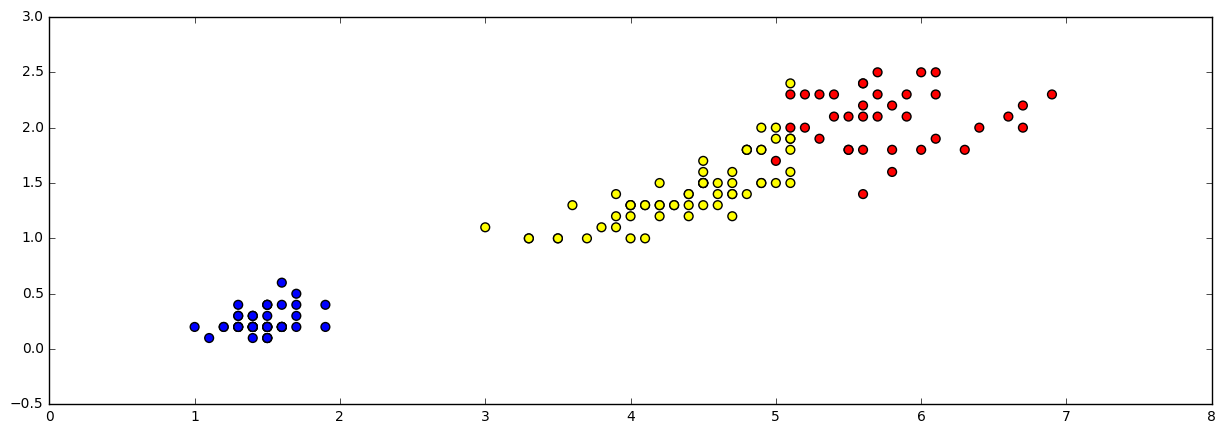

In [15]:
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[model.labels_], s =40)

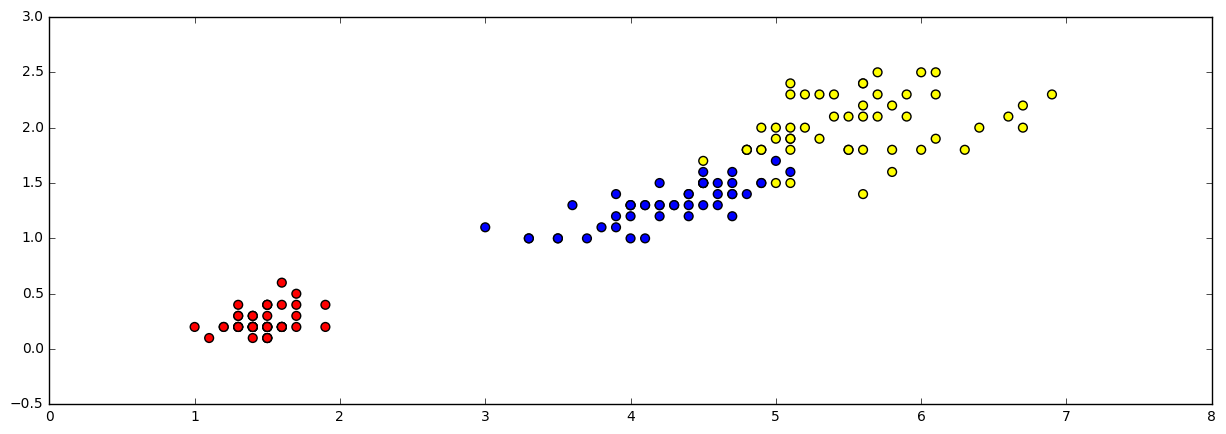

In [17]:
plt.scatter(X.Petal_Length,X.Petal_Width, c = colormap[y.Targets], s = 40)

In [34]:
# Now, the clustering is good, but we need to fix the color issue

predY = np.choose(model.labels_, [2,0,1]).astype(np.int64)

In [35]:
print(model.labels_)
print(predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


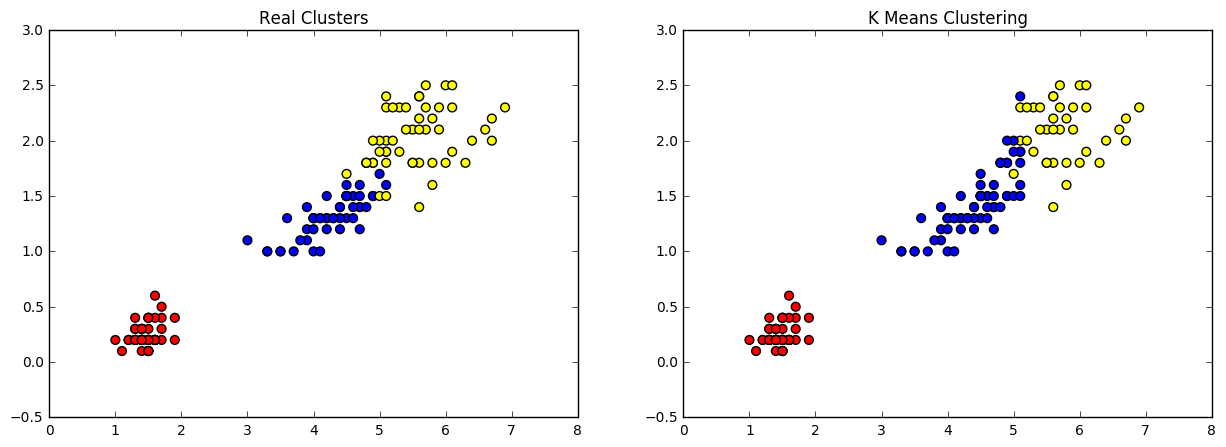

In [36]:
# Plot original graph

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title("Real Clusters")


# PLot the predicted values with corrected values

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width, c= colormap[predY], s = 40)
plt.title("K Means Clustering")